## 予測結果の分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

予測結果が付与されたデータがdata_predictedディレクトリ下に保存済み

In [2]:
df = pd.read_csv('../data_predicted/h2oai_experiment_engine_p_default_custom_dataset_modeling_engine_partial_TEST_csv_predictions.csv')
df.shape
# 本データはテストデータ（modeling_engine_partial_TEST.csv）に対する予測結果

(213, 6)

In [3]:
df

,unit_ID,cycles,time_to_deterioration,time_to_deterioration.predicted,time_to_deterioration.predicted.lower,time_to_deterioration.predicted.upper
0,3,102,104,138.948750,94.563080,200.82542
1,3,105,101,134.522310,90.136640,196.39899
2,3,108,98,133.996700,89.611040,195.87338
3,3,116,90,103.374260,58.988590,165.25095
4,3,127,79,98.463690,54.078022,160.34036
...,...,...,...,...,...,...
208,254,165,95,77.783516,33.397846,139.66019
209,254,168,92,100.095870,55.710200,161.97255
210,254,179,81,78.363100,33.977430,140.23978
211,254,182,78,67.430565,23.044895,129.30725


In [4]:
df = df.drop(columns=['time_to_deterioration.predicted.lower', 'time_to_deterioration.predicted.upper'])

In [5]:
df

,unit_ID,cycles,time_to_deterioration,time_to_deterioration.predicted
0,3,102,104,138.948750
1,3,105,101,134.522310
2,3,108,98,133.996700
3,3,116,90,103.374260
4,3,127,79,98.463690
...,...,...,...,...
208,254,165,95,77.783516
209,254,168,92,100.095870
210,254,179,81,78.363100
211,254,182,78,67.430565


In [6]:
df.describe()

,unit_ID,cycles,time_to_deterioration,time_to_deterioration.predicted
count,213.000000,213.000000,213.000000,213.000000
mean,107.497653,146.521127,72.258216,73.621167
std,74.224648,26.659555,52.841111,36.987498
min,3.000000,102.000000,1.000000,-0.046614
25%,48.000000,127.000000,30.000000,46.065754
50%,99.000000,144.000000,68.000000,72.094670
75%,127.000000,168.000000,99.000000,99.445050
max,254.000000,200.000000,275.000000,167.697190


### 予実プロット

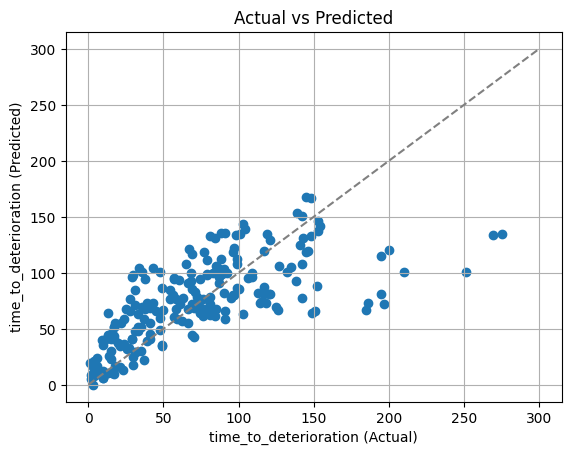

In [7]:
plt.scatter(df['time_to_deterioration'], df['time_to_deterioration.predicted'])
plt.plot([0, 300], [0, 300], color="gray", linestyle="--")
plt.grid()

#plt.plot([0, 0], [200, 200], color="green")

plt.xlabel('time_to_deterioration (Actual)')
plt.ylabel('time_to_deterioration (Predicted)')
plt.title('Actual vs Predicted')
#plt.legend()
plt.show()

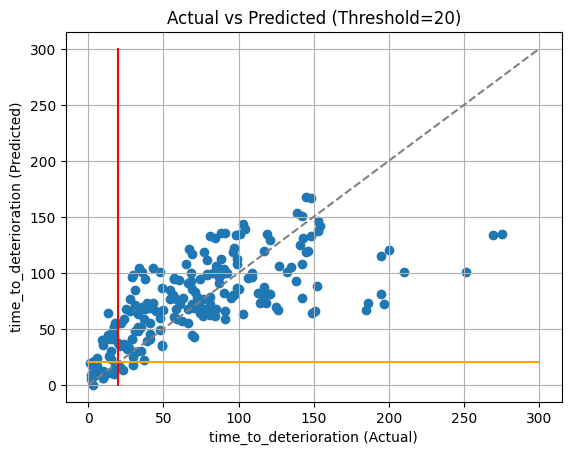

In [8]:
# 閾値を予実プロットに描画
th = 20

plt.scatter(df['time_to_deterioration'], df['time_to_deterioration.predicted'])
plt.plot([0, 300], [0, 300], color="gray", linestyle="--")

#plt.plot([th, th], [0, 250], color="red", linewidth=2)   # 縦線
plt.plot([th, th], [0, 300], color="red")   # 縦線
plt.plot([0, 300], [th, th], color="orange")   # 横線


plt.grid()

#plt.plot([0, 0], [200, 200], color="green")

plt.xlabel('time_to_deterioration (Actual)')
plt.ylabel('time_to_deterioration (Predicted)')
plt.title('Actual vs Predicted (Threshold={})'.format(th))
#plt.legend()
plt.show()

### 閾値による"コスト削減"vs"リスク"

In [9]:
# Predictedのどこを閾値にするか？ある閾値を指定した場合の、検査対象と非検査対象のオブザベーション
threshold = 10
df_inspect = df[df['time_to_deterioration.predicted'] <= threshold]   # 検査対象
print(df_inspect.shape[0])   # 検査実施数
display(df_inspect)
df_no_inspect = df[df['time_to_deterioration.predicted'] > threshold]   # 非検査対象 -> ここからリスク案件を取得
print(df_no_inspect.shape[0])   # 非検査実施数
display(df_no_inspect)

10


,unit_ID,cycles,time_to_deterioration,time_to_deterioration.predicted
39,33,178,17,9.561213
41,33,185,10,6.186913
42,33,192,3,-0.046614
51,40,183,10,5.844222
112,99,196,6,9.265581
113,99,200,2,8.533373
135,114,192,11,9.362046
168,177,177,4,8.144356
169,177,178,3,8.639201
170,177,179,2,5.476778


203


,unit_ID,cycles,time_to_deterioration,time_to_deterioration.predicted
0,3,102,104,138.948750
1,3,105,101,134.522310
2,3,108,98,133.996700
3,3,116,90,103.374260
4,3,127,79,98.463690
...,...,...,...,...
208,254,165,95,77.783516
209,254,168,92,100.095870
210,254,179,81,78.363100
211,254,182,78,67.430565


In [10]:
df_no_inspect.describe()

,unit_ID,cycles,time_to_deterioration,time_to_deterioration.predicted
count,203.000000,203.000000,203.000000,203.000000
mean,107.955665,144.576355,75.482759,76.898234
std,74.861079,25.725663,52.026207,34.720904
min,3.000000,102.000000,1.000000,10.287467
25%,48.000000,124.000000,33.000000,53.307878
50%,99.000000,142.000000,70.000000,73.156730
75%,127.000000,165.000000,100.500000,100.066535
max,254.000000,200.000000,275.000000,167.697190


In [13]:
# 予測<実際 (予想より寿命が短い) がリスク
sum(df_no_inspect['time_to_deterioration'] < df_no_inspect['time_to_deterioration.predicted']), sum(df_no_inspect['time_to_deterioration'] < df_no_inspect['time_to_deterioration.predicted'])/df_no_inspect.shape[0]

(121, 0.5960591133004927)

In [14]:
# 予測閾値<実際（すぐ寿命が来る）がリスク
sum(df_no_inspect['time_to_deterioration'] < threshold), sum(df_no_inspect['time_to_deterioration'] < threshold)/df_no_inspect.shape[0], 

(7, 0.034482758620689655)

In [17]:
# 閾値を5~100（5刻み）でシミュレーション

list_threshold = []
list_n_inspect = []
list_n_no_inspect = []
list_pct_save = []
list_n_pred_risk = []
list_pct_pred_risk = []
list_n_thresh_risk = []
list_pct_thresh_risk = []

dict_df_no_inspect = {}   # {threshold: df_no_inspect}

for th in [i*5 for i in range(1,21)]:
    df_inspect = df[df['time_to_deterioration.predicted'] <= th]   # 検査対象
    n_inspect = df_inspect.shape[0]
    df_no_inspect = df[df['time_to_deterioration.predicted'] > th]   # 非検査対象 -> ここからリスク案件を取得
    n_no_inspect = df_no_inspect.shape[0]
    n_pred_risk = sum(df_no_inspect['time_to_deterioration'] < df_no_inspect['time_to_deterioration.predicted'])  # 実際<予測
    n_thresh_risk = sum(df_no_inspect['time_to_deterioration'] < th)  # 実際<予測閾値
    pct_pred_risk = n_pred_risk/n_no_inspect
    pct_thresh_risk = n_thresh_risk/n_no_inspect
    list_threshold.append(th)
    list_n_inspect.append(n_inspect)
    list_n_no_inspect.append(n_no_inspect)
    list_pct_save.append(n_no_inspect/213)   # 検査数を減らせる割合
    list_n_pred_risk.append(n_pred_risk)
    list_pct_pred_risk.append(pct_pred_risk)
    list_n_thresh_risk.append(n_thresh_risk)
    list_pct_thresh_risk.append(pct_thresh_risk)
    dict_df_no_inspect[th] = df_no_inspect

df_res = pd.DataFrame({'threshold':list_threshold,
                       'n_inspect':list_n_inspect,
                       'n_no_inspect':list_n_no_inspect,
                       'pct_save':list_pct_save,
                       'n_pred_risk':list_n_pred_risk,
                       'pct_pred_risk':list_pct_pred_risk,
                       'n_thresh_risk':list_n_thresh_risk,
                       'pct_thresh_risk':list_pct_thresh_risk,
                      })
df_res

,threshold,n_inspect,n_no_inspect,pct_save,n_pred_risk,pct_pred_risk,n_thresh_risk,pct_thresh_risk
0,5,1,212,0.995305,126,0.594340,8,0.037736
1,10,10,203,0.953052,121,0.596059,7,0.034483
2,15,14,199,0.934272,120,0.603015,13,0.065327
3,20,21,192,0.901408,116,0.604167,18,0.093750
4,25,25,188,0.882629,113,0.601064,20,0.106383
5,30,30,183,0.859155,111,0.606557,26,0.142077
6,35,35,178,0.835681,108,0.606742,31,0.174157
7,40,40,173,0.812207,104,0.601156,35,0.202312
8,45,52,161,0.755869,95,0.590062,31,0.192547
9,50,57,156,0.732394,90,0.576923,31,0.198718


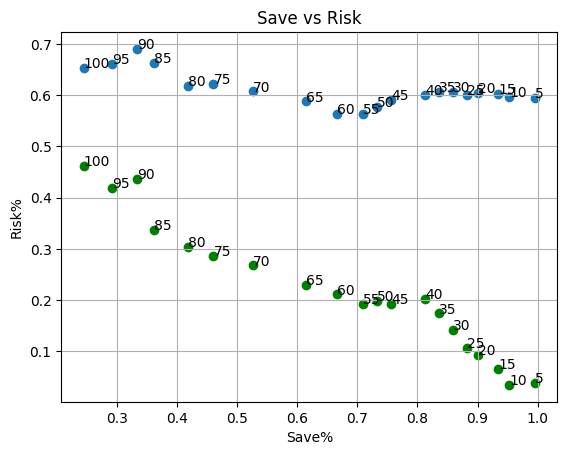

In [36]:
# コスト削減 vs リスク

plt.scatter(df_res['pct_save'], df_res['pct_pred_risk'])   # 予測リスク
for i, label in enumerate(df_res['threshold']):
    plt.text(df_res['pct_save'][i], df_res['pct_pred_risk'][i], label)

plt.scatter(df_res['pct_save'], df_res['pct_thresh_risk'], c='g')   # 閾値リスク
for i, label in enumerate(df_res['threshold']):
    plt.text(df_res['pct_save'][i], df_res['pct_thresh_risk'][i], label)

plt.grid()

plt.xlabel('Save%')
plt.ylabel('Risk%')
plt.title('Save vs Risk')
#plt.legend()
plt.show()

# コスト削減を増やしてもリスクが増えるわけではない

In [37]:
df_res.to_csv('../data_predicted/save_vs_risk.csv', index=False)